In [1]:
# Super Market Sales Analysis

In [2]:
# https://www.kaggle.com/code/yogababu/super-market-sales-analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("supermarket_sales - Sheet1.csv",index_col="Invoice ID")
data

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7


In [7]:
data.shape

(1000, 16)

In [8]:
data.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [9]:
data.info

<bound method DataFrame.info of             Branch       City Customer type  Gender            Product line  \
Invoice ID                                                                    
750-67-8428      A     Yangon        Member  Female       Health and beauty   
226-31-3081      C  Naypyitaw        Normal  Female  Electronic accessories   
631-41-3108      A     Yangon        Normal    Male      Home and lifestyle   
123-19-1176      A     Yangon        Member    Male       Health and beauty   
373-73-7910      A     Yangon        Normal    Male       Sports and travel   
...            ...        ...           ...     ...                     ...   
233-67-5758      C  Naypyitaw        Normal    Male       Health and beauty   
303-96-2227      B   Mandalay        Normal  Female      Home and lifestyle   
727-02-1313      A     Yangon        Member    Male      Food and beverages   
347-56-2442      A     Yangon        Normal    Male      Home and lifestyle   
849-09-3807      A  

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

In [10]:
data.describe

<bound method NDFrame.describe of             Branch       City Customer type  Gender            Product line  \
Invoice ID                                                                    
750-67-8428      A     Yangon        Member  Female       Health and beauty   
226-31-3081      C  Naypyitaw        Normal  Female  Electronic accessories   
631-41-3108      A     Yangon        Normal    Male      Home and lifestyle   
123-19-1176      A     Yangon        Member    Male       Health and beauty   
373-73-7910      A     Yangon        Normal    Male       Sports and travel   
...            ...        ...           ...     ...                     ...   
233-67-5758      C  Naypyitaw        Normal    Male       Health and beauty   
303-96-2227      B   Mandalay        Normal  Female      Home and lifestyle   
727-02-1313      A     Yangon        Member    Male      Food and beverages   
347-56-2442      A     Yangon        Normal    Male      Home and lifestyle   
849-09-3807      A

In [11]:
print(data.isnull().sum())

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


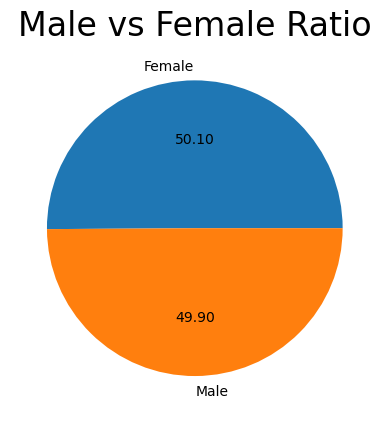

In [12]:
female=data.loc[data['Gender']=='Female'].count()[0]
male=data.loc[data['Gender']=='Male'].count()[0]
labels=['Female','Male']
colors=(['#abcdef','#aabbcc'])
plt.pie([female,male],labels=labels,autopct='%.2f')
plt.title('Male vs Female Ratio',fontsize=24)


plt.show()

In [13]:
# As per above diagram we can observe male and female contribution is almost equalls

# Now we are find out how much sales done in each city

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

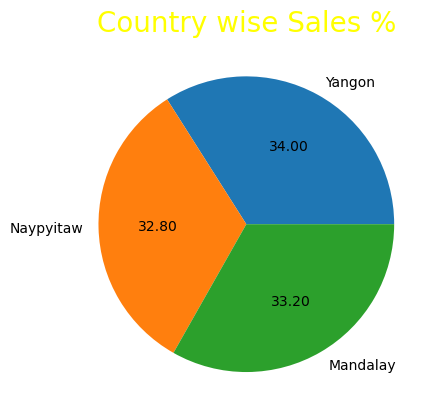

In [18]:
yangon=data.loc[data['City']=='Yangon'].count()[0]
naypyitaw=data.loc[data['City']=='Naypyitaw'].count()[0]
mandalay=data.loc[data['City']=='Mandalay'].count()[0]
labels=['Yangon','Naypyitaw','Mandalay']
plt.pie([yangon,naypyitaw,mandalay],labels=labels,autopct='%.2f')
plt.title('Country wise Sales %',fontsize=20,color='Yellow')

plt.show()

As per above output diagram we can observe each city have a equal sales

Now we will find out which payment method customers using widely

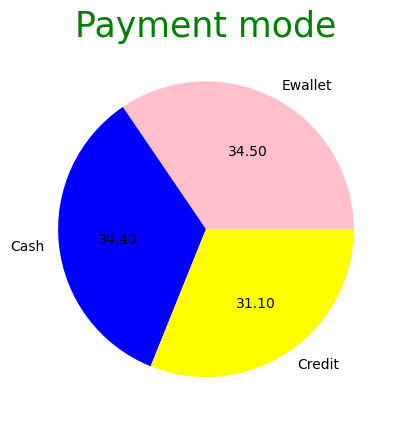

In [19]:
ewallet=data.loc[data['Payment']=='Ewallet'].count()[0]
cash=data.loc[data['Payment']=='Cash'].count()[0]
credit=data.loc[data['Payment']=='Credit card'].count()[0]
labels=['Ewallet','Cash','Credit']
colors=['pink','blue','yellow']
plt.pie([ewallet,cash,credit],labels=labels,autopct='%.2f',colors=colors)
plt.title('Payment mode',fontsize=25,color='green')

plt.show()

As usual customers using all payments methods [Ewallet,Cash,Credit] using equally

Now we will find out how much profit grnerated ny each City

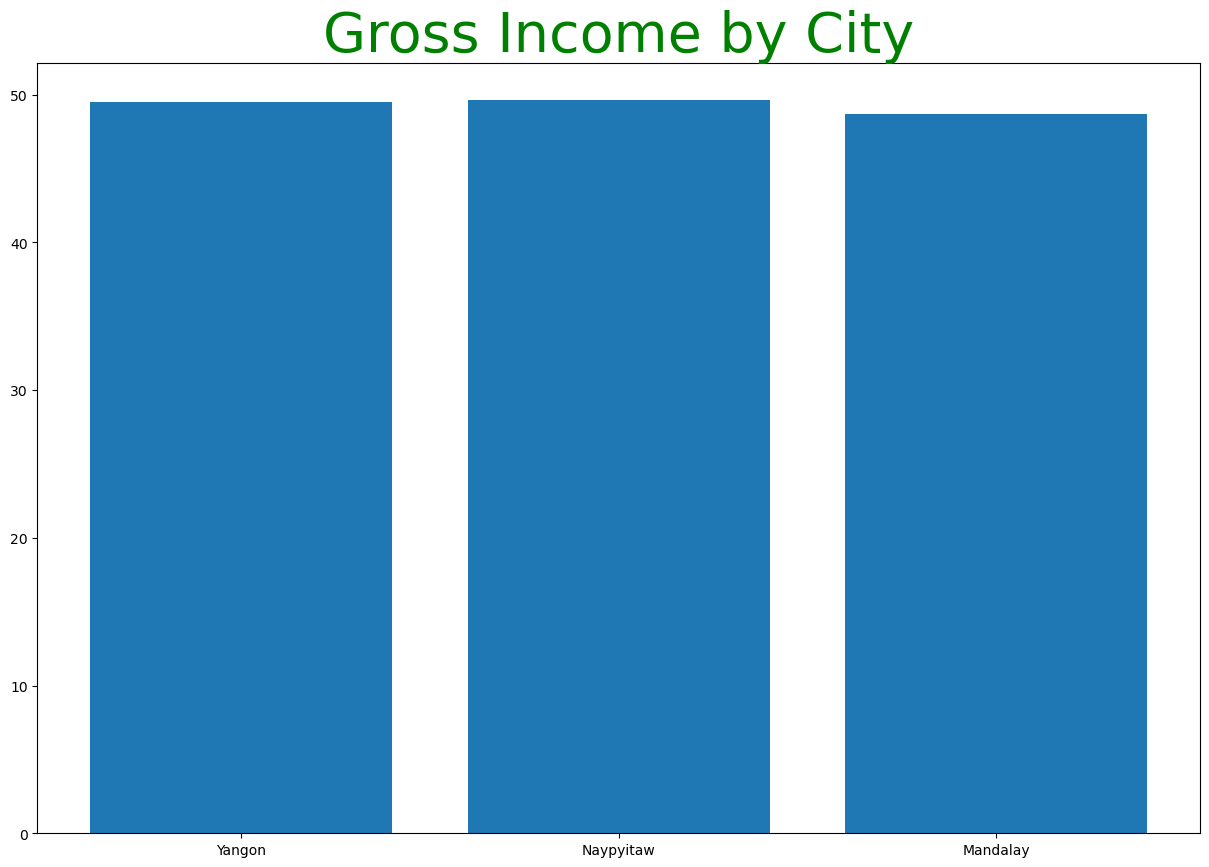

In [20]:
plt.figure(figsize=(15,10))
plt.bar(data.City,data['gross income'],label='2x')
plt.title('Gross Income by City',fontsize=40,color='green')


plt.show()


As per above diagram profits also similler from all citys

SUMMARY

After completion of this python EDA (Exploratary Data Analysis) project we can improove our data analysing skills and visualization skills Super market data have all measures equally